C:\Users\josed\Documents\Jupyter_Notebooks\raw.githubusercontent.com\peterjsadowski\sklearn_examples\master\training_data.csv
13616.159962
63877.52869566004


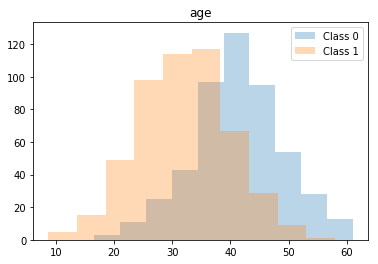

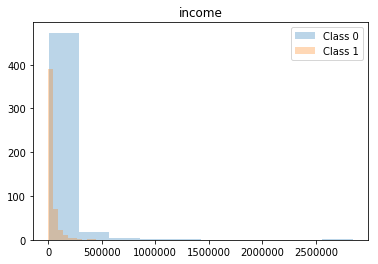

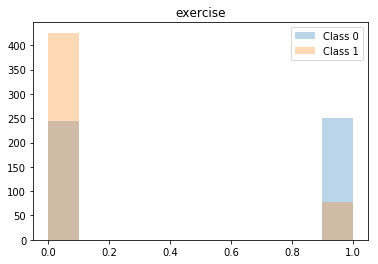

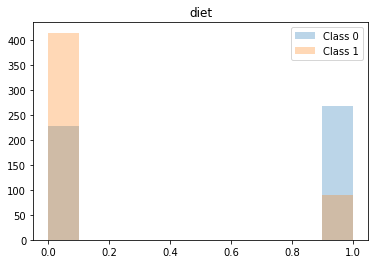

In [1]:
# This notebook provides an example of how to use sklearn classifiers.
# Loads data from train_data.csv.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
# For more details see https://scikit-learn.org/stable/modules/linear_model.html

# Load data.
data_url = 'https://raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/training_data.csv'
localfile = np.DataSource(destpath='./').open(data_url).name
print(localfile)
data = np.loadtxt(localfile, skiprows=1, delimiter=',')
Y = data[:, 0] 
X = data[:, 1:]
print(data.mean())
print(data.std())
# Plot features. 
feature_names = ['age', 'income', 'exercise', 'diet']
for i in range(X.shape[1]):
    plt.figure(i)
    plt.hist(X[Y==0, i], label='Class 0', alpha=0.3)
    plt.hist(X[Y==1, i], label='Class 1', alpha=0.3)
    plt.title(feature_names[i])
    plt.legend()

In [2]:

scaler = StandardScaler()
scaler.fit(data)
norm_data=scaler.transform(data)
StandardScaler(copy=True, with_mean=True, with_std=True)
print(norm_data.mean())
print(norm_data.std())
Y2 = norm_data[:, 0].astype(int)
X2 = norm_data[:, 1:]
"""
for i in range(X2.shape[1]):
    plt.figure(i)
    plt.hist(X2[Y2==-1, i], label='Class 0', alpha=0.3)
    plt.hist(X2[Y2==0, i], label='Class 1', alpha=0.3)
    plt.title(feature_names[i])
    plt.legend()
"""

1.1368683772161603e-16
0.999999999999997


"\nfor i in range(X2.shape[1]):\n    plt.figure(i)\n    plt.hist(X2[Y2==-1, i], label='Class 0', alpha=0.3)\n    plt.hist(X2[Y2==0, i], label='Class 1', alpha=0.3)\n    plt.title(feature_names[i])\n    plt.legend()\n"

In [3]:
### Classifier 

# Preprocess data.
X[:, 0] /= 100. 
X[:, 1] /= 100000.

# Divide data into train and validation set.
N_train, N_valid = 900, 100
X_train, X_valid = X[0:N_train, :], X[N_train:, :]
y_train, y_valid = Y[0:N_train], Y[N_train:]

# Define a classifier model. (Lots of options to choose from.)
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
clf2 = linear_model.RidgeClassifier(alpha=0.1)
clf3 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Fit/train/learn.
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Compute accuracy on training data.
accuracy_train = clf.score(X_train, y_train)
print(f'Training accuracy linear for SGD: {accuracy_train:0.2}')
# Compute accuracy on training data.
accuracy_train = clf2.score(X_train, y_train)
print(f'Training accuracy linear for Ridge: {accuracy_train:0.2}')
accuracy_train = clf3.score(X_train, y_train)
print(f'Training accuracy for K: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted = clf.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy: {accuracy_valid:0.2}')
print('Validation predictions: ', y_predicted)

print('Coefficients: ', clf.coef_, clf.intercept_)

y_predicted = clf2.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy for Ridge: {accuracy_valid:0.2}')
print('Validation predictions for Ridge: ', y_predicted)

print('Coefficients for Ridge: ', clf2.coef_, clf2.intercept_)

y_predicted = clf3.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy for K: {accuracy_valid:0.2}')
print('Validation predictions for K: ', y_predicted)


Training accuracy linear for SGD: 0.76
Training accuracy linear for Ridge: 0.82
Training accuracy for K: 1.0
Validation accuracy: 0.73
Validation predictions:  [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1.]
Coefficients:  [[-0.31714052 -0.58193958 -0.86683395 -0.80218507]] [1.22]
Validation accuracy for Ridge: 0.81
Validation predictions for Ridge:  [1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1.]
Coefficients for Ridge:  [[-4.54000346 -0.10879314 -0.57767725 -0.53714035]] [2.133

In [4]:
### Classifier 

# Preprocess data.
X2[:, 0]# /= 100. 
X2[:, 1]# /= 100000.

# Divide data into train and validation set.
N_train, N_valid = 900, 100
X_train, X_valid = X2[0:N_train, :], X2[N_train:, :]
y_train, y_valid = Y2[0:N_train], Y2[N_train:]

# Define a classifier model. (Lots of options to choose from.)
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
clf2 = linear_model.RidgeClassifier(alpha=0.1)
clf3 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Fit/train/learn.
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Compute accuracy on training data.
accuracy_train = clf.score(X_train, y_train)
print(f'Training accuracy linear for SGD: {accuracy_train:0.2}')
# Compute accuracy on training data.
accuracy_train = clf2.score(X_train, y_train)
print(f'Training accuracy linear for Ridge: {accuracy_train:0.2}')
accuracy_train = clf3.score(X_train, y_train)
print(f'Training accuracy for K: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted = clf.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy: {accuracy_valid:0.2}')
print('Validation predictions: ', y_predicted)

print('Coefficients: ', clf.coef_, clf.intercept_)

y_predicted = clf2.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy for Ridge: {accuracy_valid:0.2}')
print('Validation predictions for Ridge: ', y_predicted)

print('Coefficients for Ridge: ', clf2.coef_, clf2.intercept_)

y_predicted = clf3.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy for K: {accuracy_valid:0.2}')
print('Validation predictions for K: ', y_predicted)

Training accuracy linear for SGD: 0.83
Training accuracy linear for Ridge: 0.82
Training accuracy for K: 1.0
Validation accuracy: 0.82
Validation predictions:  [ 0 -1  0  0 -1  0 -1  0  0  0  0 -1  0 -1 -1  0  0 -1  0 -1  0  0  0 -1
 -1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1  0 -1 -1 -1  0  0  0 -1  0
  0  0  0  0  0  0  0 -1 -1 -1  0 -1  0 -1  0 -1  0  0  0  0  0 -1  0  0
 -1  0 -1  0 -1 -1  0  0 -1  0  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
  0  0  0  0]
Coefficients:  [[-0.69396632 -0.5867753  -0.44116903 -0.52607825]] [0.06]
Validation accuracy for Ridge: 0.81
Validation predictions for Ridge:  [ 0 -1  0  0 -1  0 -1  0  0  0  0 -1  0 -1 -1  0  0 -1  0 -1  0 -1  0 -1
 -1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1  0 -1 -1 -1  0  0  0 -1  0
  0  0  0  0  0  0  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0  0  0  0 -1  0  0
 -1  0 -1  0 -1 -1  0  0 -1  0  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1  0  0]
Coefficients for Ridge:  [[-0.41307088 -0.14011914 -0.27072729 -0.2565562 ]] [0.015

In [5]:
### Example of Cross-Validation
from sklearn.model_selection import cross_val_score
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
cv_scores = cross_val_score(clf, X, Y, cv=5)
print('Cross-validation accuracies: ', cv_scores)
print('Mean CV accuracy: %0.2f' % np.mean(cv_scores))

Cross-validation accuracies:  [0.74626866 0.785      0.77       0.785      0.73869347]
Mean CV accuracy: 0.76


In [6]:
### Example of Cross-Validation
from sklearn.model_selection import cross_val_score
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
cv_scores = cross_val_score(clf, X2, Y2, cv=5)
print('Cross-validation accuracies: ', cv_scores)
print('Mean CV accuracy: %0.2f' % np.mean(cv_scores))

Cross-validation accuracies:  [0.8159204 0.85      0.805     0.84      0.8040201]
Mean CV accuracy: 0.82


In [7]:
### Example of Cross-Validation
from sklearn.model_selection import cross_val_score
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.2, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
cv_scores = cross_val_score(clf, X2, Y2, cv=5)
print('Cross-validation accuracies: ', cv_scores)
print('Mean CV accuracy: %0.2f' % np.mean(cv_scores))

Cross-validation accuracies:  [0.82089552 0.86       0.8        0.845      0.81407035]
Mean CV accuracy: 0.83


In [8]:
### Example of Cross-Validation
from sklearn.model_selection import cross_val_score
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.5, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
cv_scores = cross_val_score(clf, X2, Y2, cv=5)
print('Cross-validation accuracies: ', cv_scores)
print('Mean CV accuracy: %0.2f' % np.mean(cv_scores))

Cross-validation accuracies:  [0.83084577 0.85       0.785      0.86       0.81909548]
Mean CV accuracy: 0.83


In [40]:
### Example of Cross-Validation
from sklearn.model_selection import cross_val_score
pcv= np.linspace(1,10000,100)
alpha=np.linspace(1,10000,100)
for x in range(100):
    alpha[x]=1/100*(x)+1/100
    clf = linear_model.SGDClassifier(loss='hinge', penalty='none', alpha=alpha[x], learning_rate='optimal', eta0=0.0001, max_iter=100000, tol=1e-5)
    cv_scores = cross_val_score(clf, X2, Y2, cv=5)
    #print('Cross-validation accuracies: ', cv_scores)
    pcv[x]=np.mean(cv_scores)
    print('Mean CV accuracy: %0.2f' % np.mean(cv_scores))
    #print( alpha )

Mean CV accuracy: 0.78
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.84
Mean CV accuracy: 0.84
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.84
Mean CV accuracy: 0.83
Mean CV accuracy: 0.84
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.84
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.84
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.82
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV accuracy: 0.83
Mean CV acc

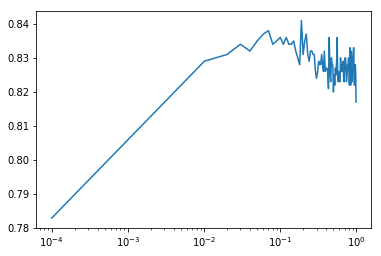

In [43]:
plt.semilogx(alpha,pcv)

In [46]:
alpha[99]

0.9901

max(pcv)


In [47]:
np.max(pcv)

0.8409833745843646

In [50]:
i=np.argmax(pcv)
alpha[i]

0.1901